In [1]:
import os
import numpy as np
from tqdm import tqdm
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import load_model


In [4]:
image_path = 'test/sentinel2_visual.tif'
model_path = 'models/11-16.keras'
output_dir = 'output'
SIZE = 128
THRESHOLD = 0.4

In [ ]:
# Load and preprocess image
original_image = np.asarray(Image.open(image_path))
original_float = original_image.astype('float') / 255.

# Convert to uint8 for OpenCV operations
image_uint8 = (original_float * 255).astype(np.uint8)

# Convert RGB to BGR for OpenCV
bgr_image = cv.cvtColor(image_uint8, cv.COLOR_RGB2BGR)

# Apply brightness and contrast adjustment
alpha = 1.2  # Contrast control
beta = 20    # Brightness control
adjusted = cv.convertScaleAbs(bgr_image, alpha=alpha, beta=beta)

# Convert back to RGB for plotting
image = cv.cvtColor(adjusted, cv.COLOR_BGR2RGB).astype('float') / 255.

# Plot images
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(original_float)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image)
plt.title('Edited Image')
plt.axis('off')

SyntaxError: invalid syntax (909226556.py, line 19)

In [21]:
h, w = image.shape[:2]

print(f"Image dimensions: {h} x {w}")

n_h = int(np.ceil(h / SIZE))
n_w = int(np.ceil(w / SIZE))

print(f"Number of tiles: {n_h} x {n_w}")

padded_h = n_h * SIZE
padded_w = n_w * SIZE

padded_image = np.zeros((padded_h, padded_w, 3))
padded_image[:h, :w, :] = image

print(f"Padded image dimensions: {padded_h} x {padded_w}")

tiles = []
positions = []
for i in range(n_h):
    for j in range(n_w):
        start_h = i * SIZE
        start_w = j * SIZE
        tile = padded_image[start_h:start_h + SIZE, start_w:start_w + SIZE].copy()
        tiles.append(tile)
        positions.append((start_h, start_w))


print(f"Created {len(tiles)} tiles")

Image dimensions: 10980 x 10980
Number of tiles: 86 x 86
Padded image dimensions: 11008 x 11008
Created 7396 tiles


In [22]:
model = load_model(model_path)
print(model.input_shape)

(None, 128, 128, 3)


  0%|          | 0/10 [00:00<?, ?it/s]

(128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 1)


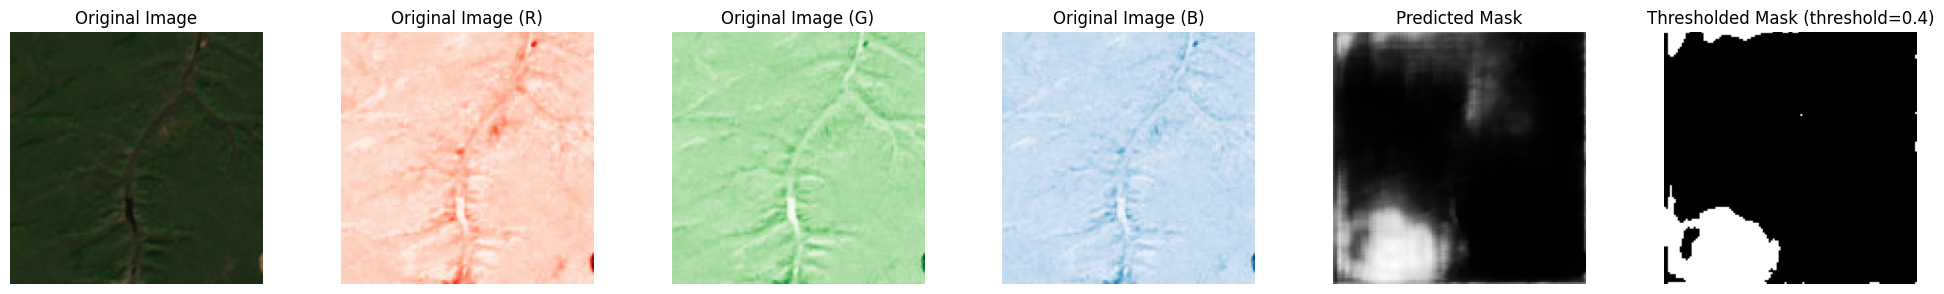

 10%|█         | 1/10 [00:00<00:04,  2.14it/s]

(128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 1)


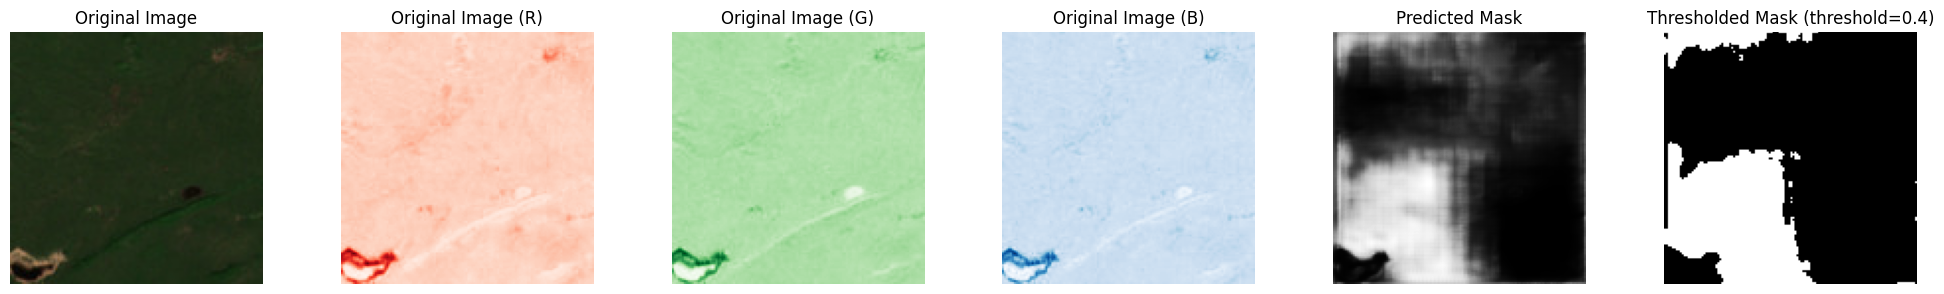

 20%|██        | 2/10 [00:00<00:02,  2.99it/s]

(128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 1)


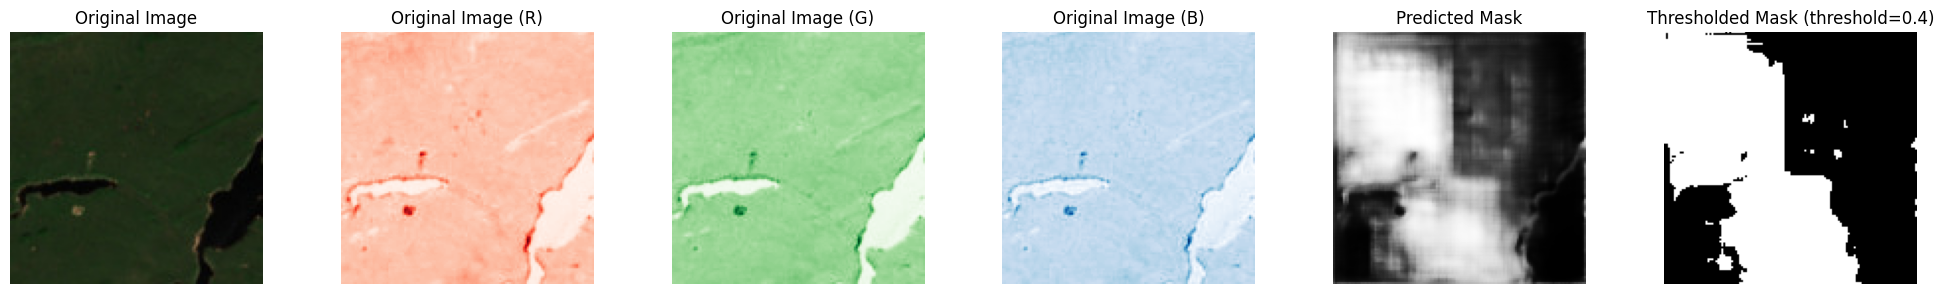

 30%|███       | 3/10 [00:00<00:01,  3.51it/s]

(128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 1)


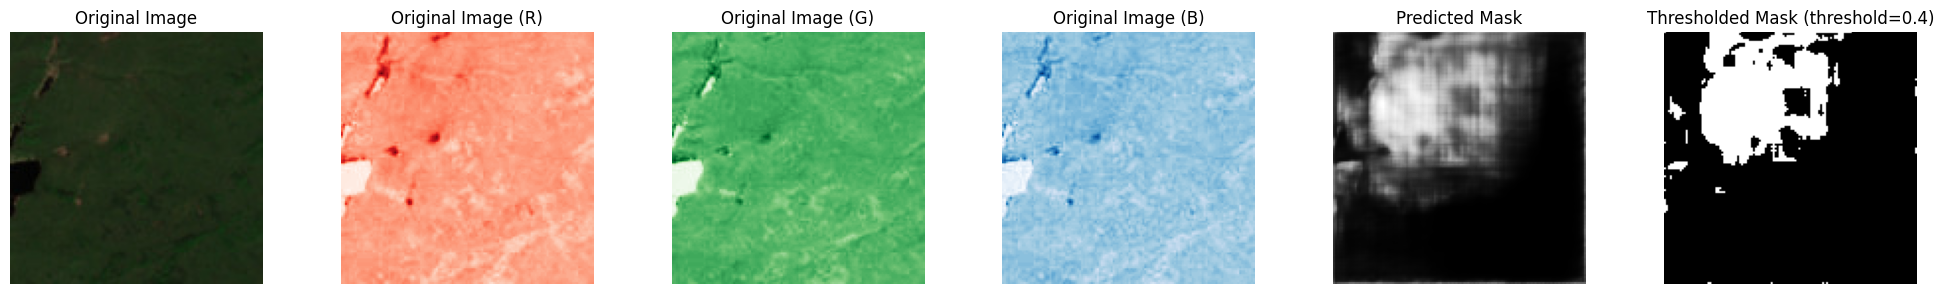

 40%|████      | 4/10 [00:01<00:01,  3.82it/s]

(128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 1)


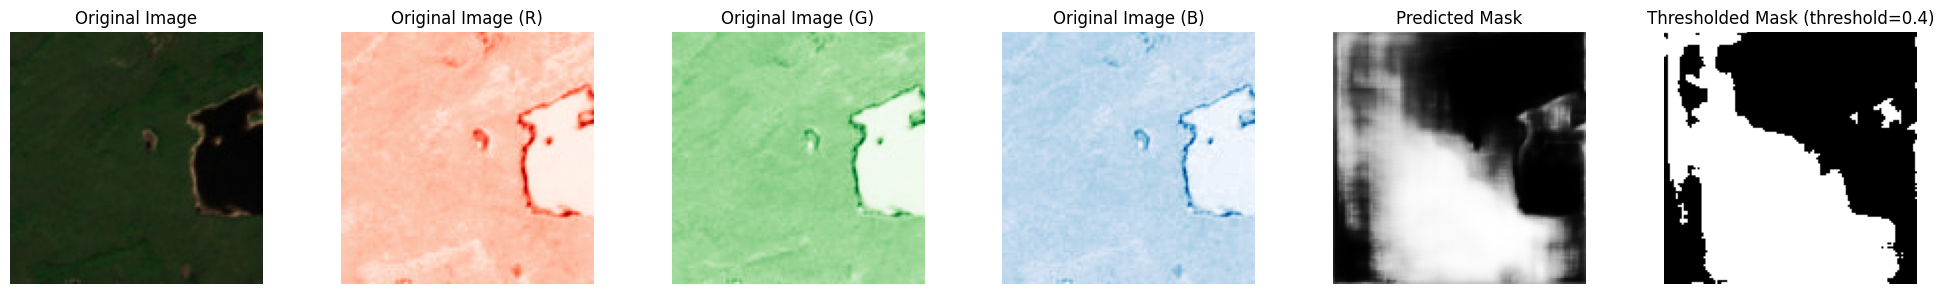

 50%|█████     | 5/10 [00:01<00:01,  3.54it/s]

(128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 1)


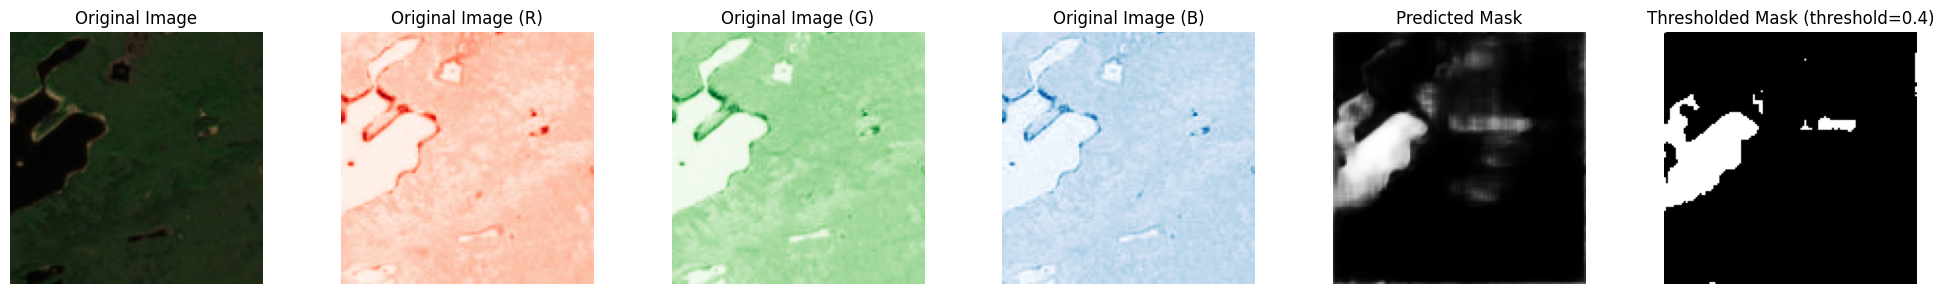

 60%|██████    | 6/10 [00:01<00:01,  3.74it/s]

(128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 1)


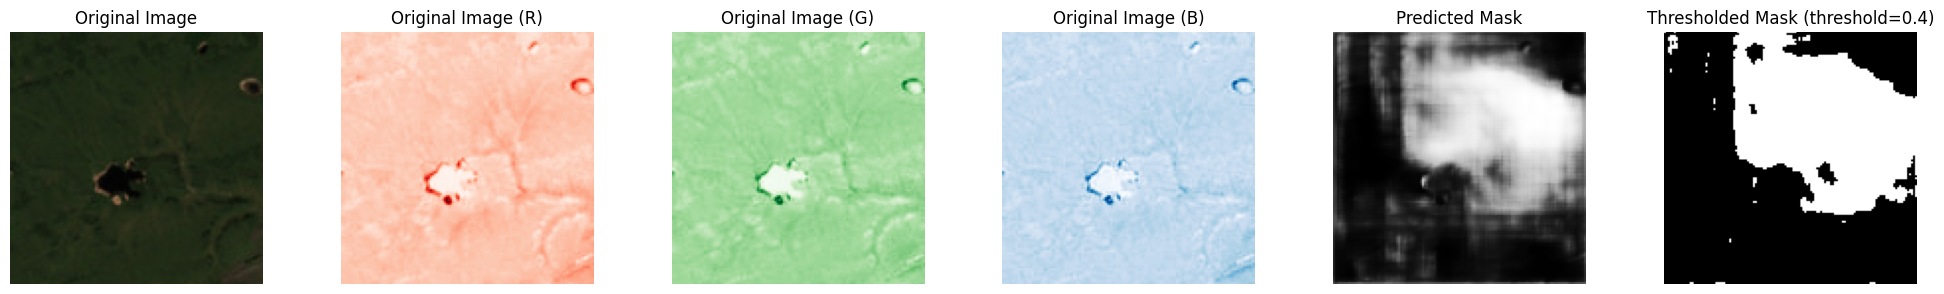

 70%|███████   | 7/10 [00:01<00:00,  3.96it/s]

(128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 1)


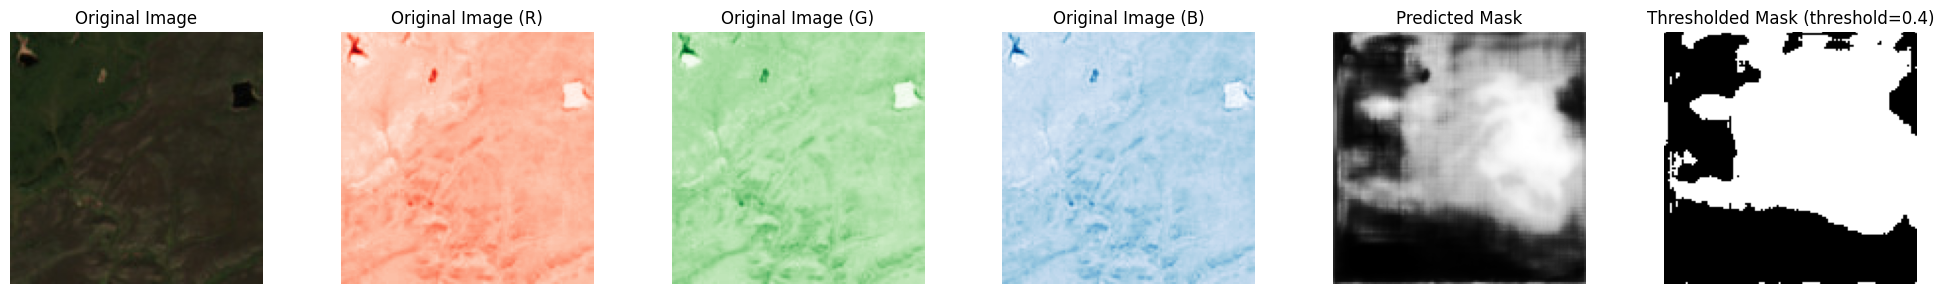

 80%|████████  | 8/10 [00:02<00:00,  4.12it/s]

(128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 1)


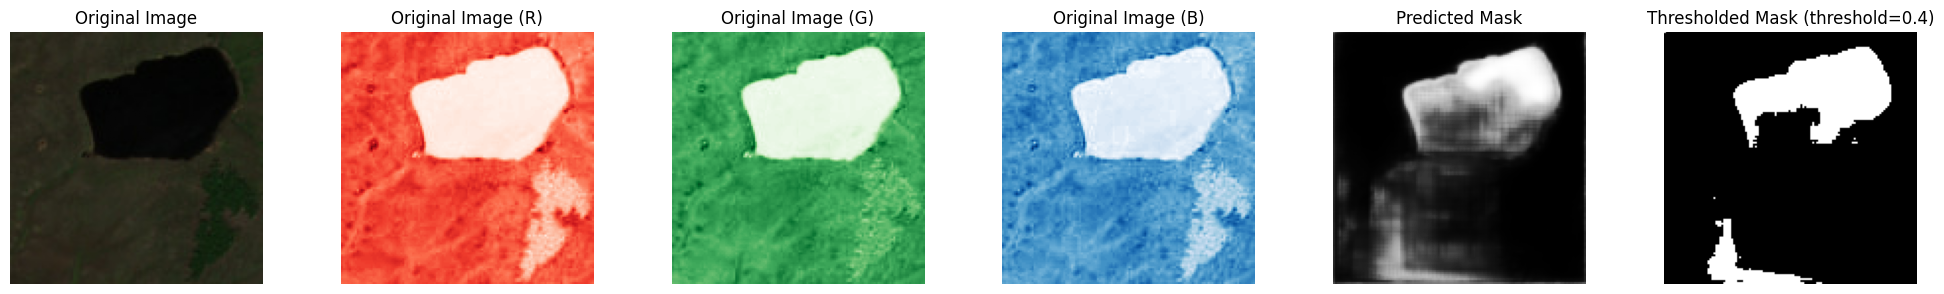

 90%|█████████ | 9/10 [00:02<00:00,  4.05it/s]

(128, 128, 3)
(1, 128, 128, 3)
(1, 128, 128, 1)


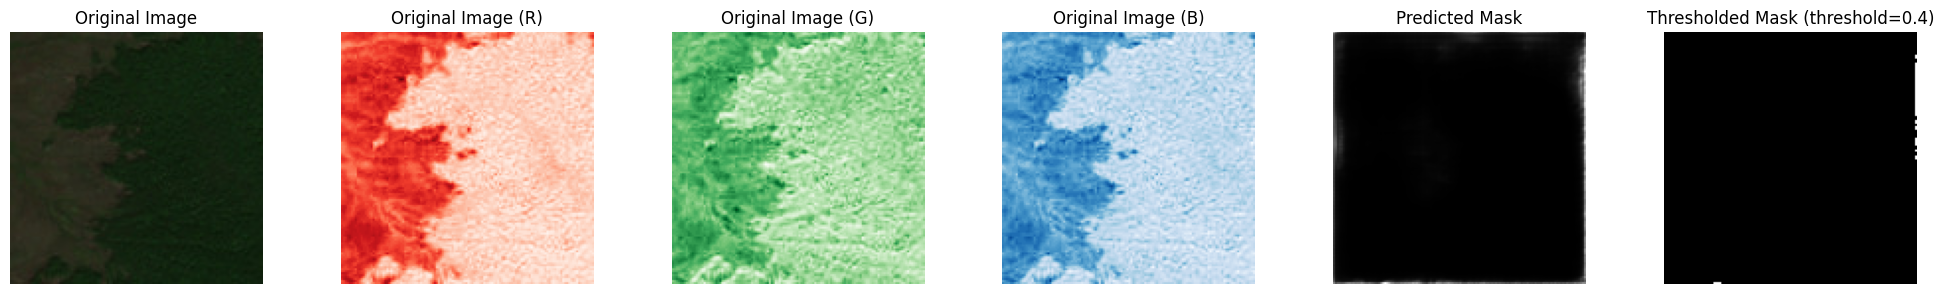

100%|██████████| 10/10 [00:02<00:00,  3.79it/s]


In [23]:
predictions = []

for tile in tqdm(tiles[:10]):
    print(tile.shape)
    tile_batch = np.expand_dims(tile, axis=0)
    print(tile_batch.shape)
    pred = model.predict(tile_batch, verbose=0)
    print(pred.shape)
    predictions.append(pred[0])

    threshold_mask = pred[0] > THRESHOLD
    
    plt.figure(figsize=(20, 3))

    plt.subplot(1, 6, 1)
    plt.imshow(tile)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 6, 2)
    plt.title('Original Image (R)')
    plt.imshow(tile[:, :, 0], cmap='Reds')
    plt.axis('off')

    plt.subplot(1, 6, 3)
    plt.title('Original Image (G)')
    plt.imshow(tile[:, :, 1], cmap='Greens')
    plt.axis('off')

    plt.subplot(1, 6, 4)
    plt.title('Original Image (B)')
    plt.imshow(tile[:, :, 2], cmap='Blues')
    plt.axis('off')

    plt.subplot(1, 6, 5)
    plt.imshow(pred[0], cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')

    plt.subplot(1, 6, 6)
    plt.imshow(threshold_mask, cmap='gray')
    plt.title(f'Thresholded Mask (threshold={THRESHOLD})')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    